In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("ca_house_price.csv")

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isnull().sum()/len(df)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

In [7]:
df["total_bedrooms"]=df["total_bedrooms"].fillna(df["total_bedrooms"].mode()[0])

In [8]:
df.isnull().sum()/len(df)

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
ocean_proximity       0.0
median_house_value    0.0
dtype: float64

# ANALYSIS

In [9]:
num_cols=df.select_dtypes(include=["int","float"])
num_cols.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [10]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

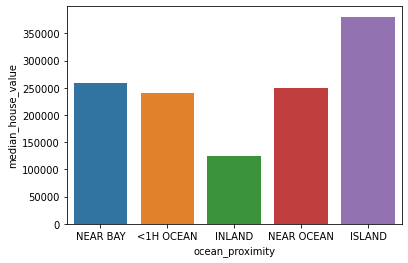

In [11]:
sns.barplot(x=df["ocean_proximity"],y=df["median_house_value"],ci=False)
plt.show()

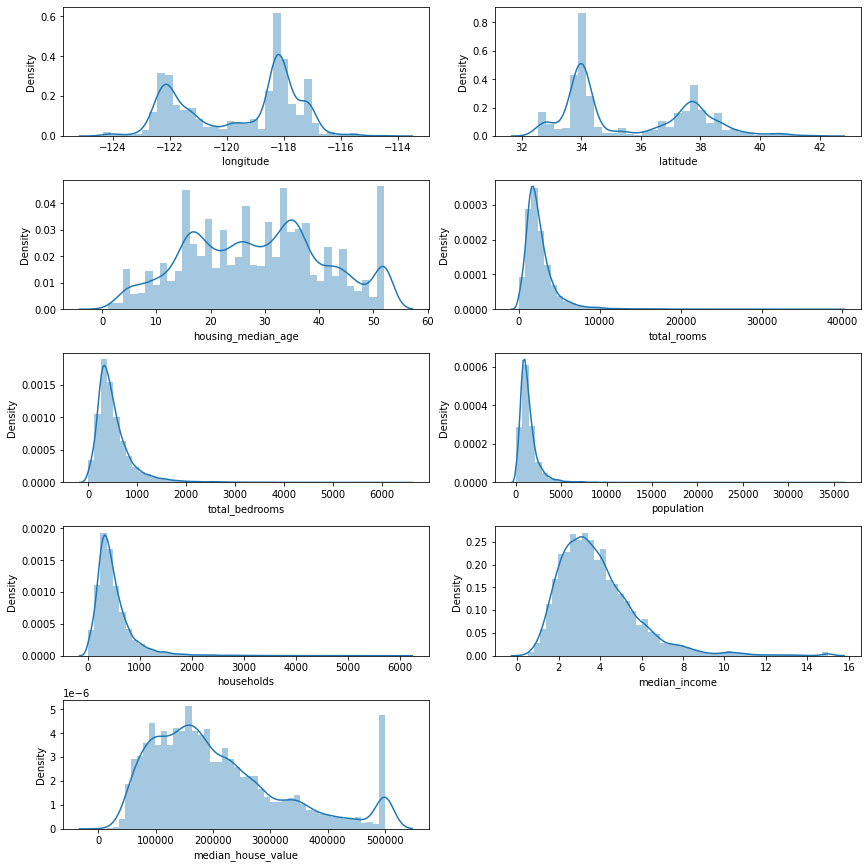

In [12]:
plt.figure(figsize=(12,12))
count=1
for i in num_cols:
    plt.subplot(5,2,count)
    sns.distplot(df[i])
    count+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=0.2)

In [13]:
print("**********************************************ANALYSIS********************************************")
print("**(1)Total rooms,Population,Households,Median_income and median house value all are right skeweed and also needs to be scalled**")

**********************************************ANALYSIS********************************************
**(1)Total rooms,Population,Households,Median_income and median house value all are right skeweed and also needs to be scalled**


In [14]:
df["Bedrooms_per_room"]=df["total_rooms"]/df["total_bedrooms"]

In [15]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]

In [16]:
df["bedrooms_per_household"] = df["total_bedrooms"]/df["households"]

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,Bedrooms_per_room,rooms_per_household,bedrooms_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,6.821705,6.984127,1.023810
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,6.418626,6.238137,0.971880
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,7.721053,8.288136,1.073446
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,5.421277,5.817352,1.073059
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,5.810714,6.281853,1.081081


<AxesSubplot:>

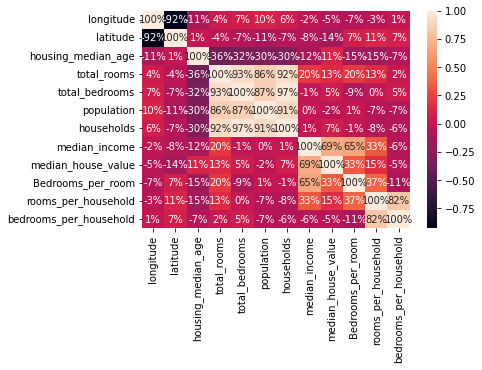

In [18]:
sns.heatmap(df.corr(),annot=True,fmt=".0%")

In [19]:
num_col=df.select_dtypes(include=["int","float"])

In [20]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Bedrooms_per_room,rooms_per_household,bedrooms_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,535.284351,1425.476744,499.539680,3.870671,206855.816909,5.026623,5.429000,1.095619
std,2.003532,2.135952,12.585558,2181.615252,420.053240,1132.462122,382.329753,1.899822,115395.615874,1.392178,2.474173,0.492644
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.550000,0.846154,0.078016
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000,4.172058,4.440716,1.005006
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000,4.927293,5.229129,1.048443
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,5.714852,6.052381,1.099574
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,41.817857,141.909091,34.066667


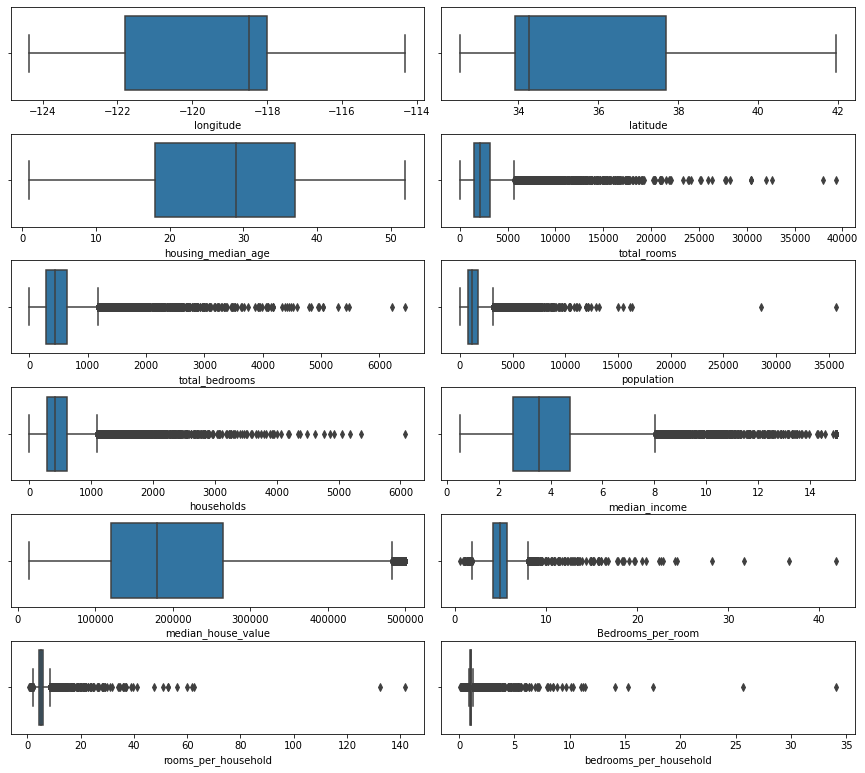

In [21]:
plt.figure(figsize=(12,12))
count=1
for i in num_col:
    plt.subplot(7,2,count)
    sns.boxplot(df[i])
    count+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=0.2)

In [22]:
A=df[df["rooms_per_household"]>100].index

In [23]:
A

Int64Index([1914, 1979], dtype='int64')

In [24]:
df["longitude"].count()

20640

In [25]:
df.drop([1914,1979],inplace=True)

In [26]:
df["longitude"].count()

20638

In [27]:
df.reset_index(drop=True,inplace=True)

In [28]:
df.drop(["total_rooms","total_bedrooms","households"],axis=1,inplace=True)

In [29]:
num_col2=df.select_dtypes(include=["int","float"])

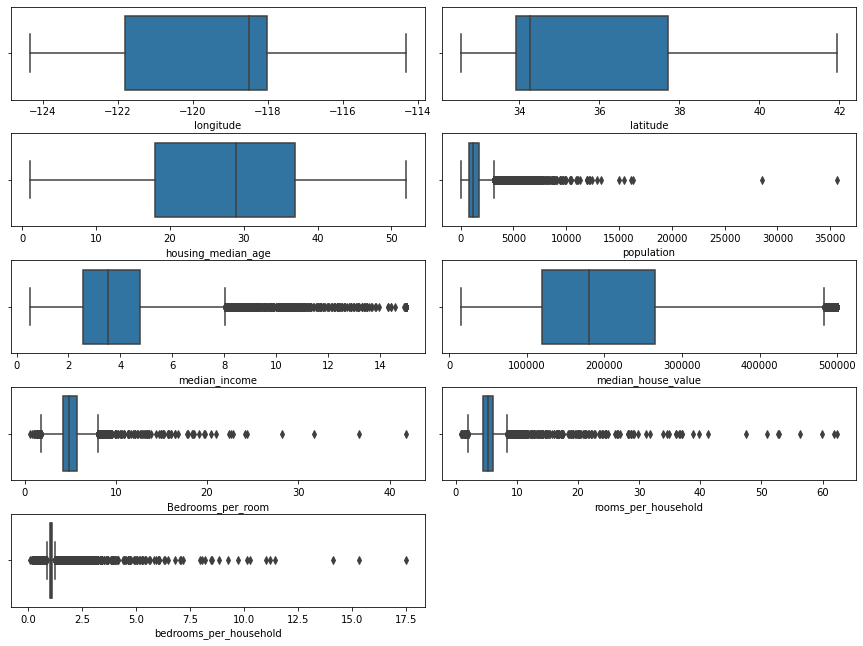

In [30]:
plt.figure(figsize=(12,12))
count=1
for i in num_col2:
    plt.subplot(7,2,count)
    sns.boxplot(df[i])
    count+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=0.2)

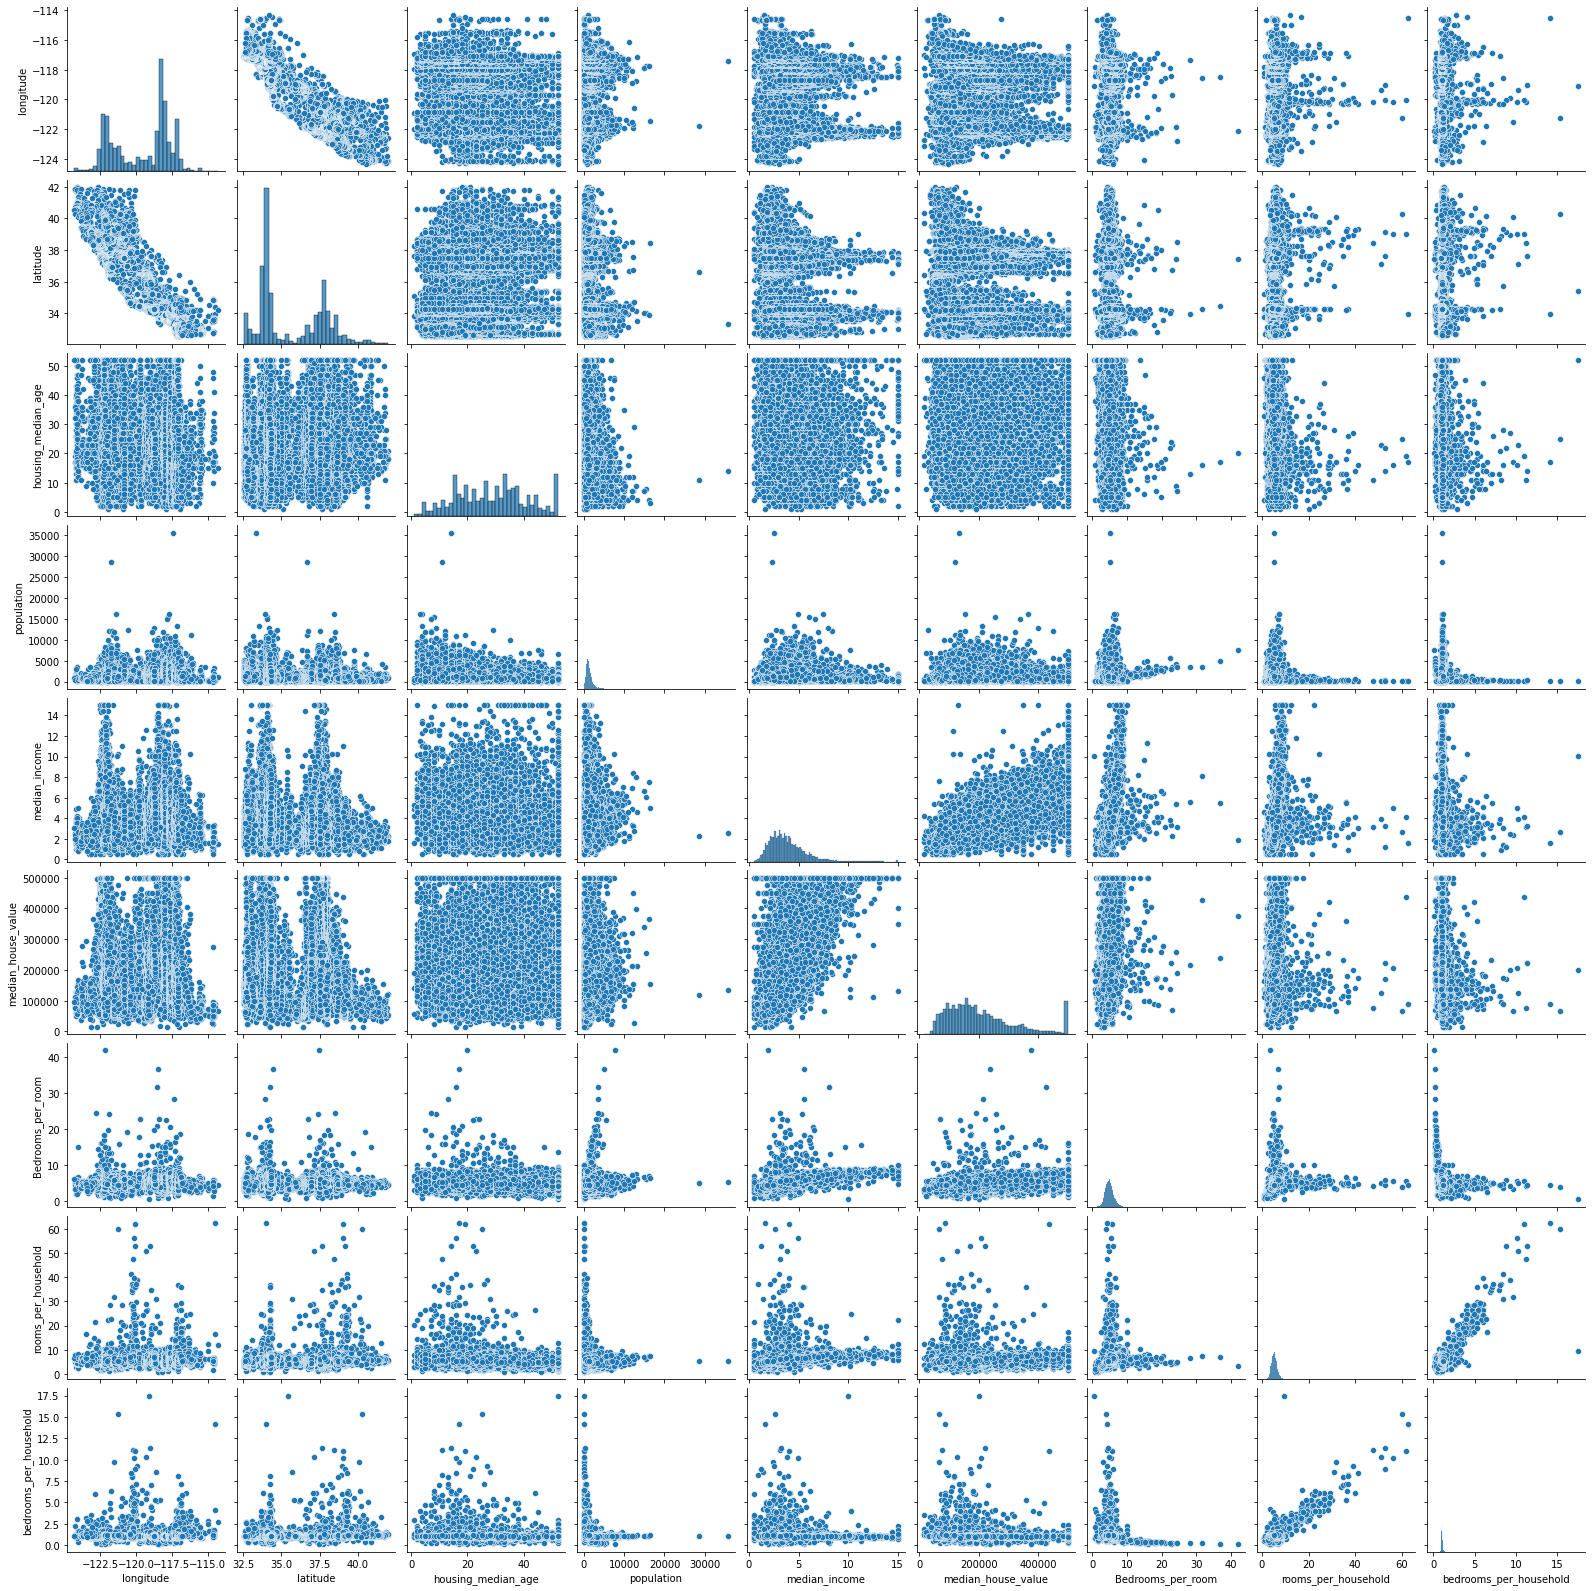

In [31]:
sns.pairplot(df)

In [32]:
df.describe()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,Bedrooms_per_room,rooms_per_household,bedrooms_per_household
count,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000
mean,-119.569654,35.631549,28.639015,1425.611687,3.870731,206843.761992,5.026654,5.416228,1.092832
std,2.003622,2.135820,12.586076,1132.434021,1.899856,115382.750510,1.392218,2.106307,0.401066
min,-124.350000,32.540000,1.000000,3.000000,0.499900,14999.000000,0.550000,0.846154,0.078016
25%,-121.800000,33.930000,18.000000,787.000000,2.563750,119600.000000,4.172115,4.440652,1.004994
50%,-118.490000,34.260000,29.000000,1166.000000,3.534800,179700.000000,4.927293,5.228973,1.048440
75%,-118.010000,37.710000,37.000000,1725.000000,4.743550,264700.000000,5.714899,6.052120,1.099567
max,-114.310000,41.950000,52.000000,35682.000000,15.000100,500001.000000,41.817857,62.422222,17.500000


In [33]:
df["median_house_value"]=np.log(df["median_house_value"])

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

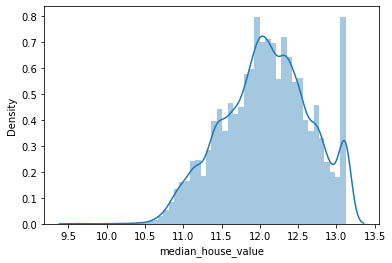

In [34]:
sns.distplot(df["median_house_value"])

In [35]:
df.describe()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,Bedrooms_per_room,rooms_per_household,bedrooms_per_household
count,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000
mean,-119.569654,35.631549,28.639015,1425.611687,3.870731,12.084838,5.026654,5.416228,1.092832
std,2.003622,2.135820,12.586076,1132.434021,1.899856,0.569116,1.392218,2.106307,0.401066
min,-124.350000,32.540000,1.000000,3.000000,0.499900,9.615739,0.550000,0.846154,0.078016
25%,-121.800000,33.930000,18.000000,787.000000,2.563750,11.691908,4.172115,4.440652,1.004994
50%,-118.490000,34.260000,29.000000,1166.000000,3.534800,12.099044,4.927293,5.228973,1.048440
75%,-118.010000,37.710000,37.000000,1725.000000,4.743550,12.486352,5.714899,6.052120,1.099567
max,-114.310000,41.950000,52.000000,35682.000000,15.000100,13.122365,41.817857,62.422222,17.500000


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc=StandardScaler()

In [35]:
cols=["longitude","latitude",'housing_median_age','population','median_income','Bedrooms_per_room','rooms_per_household','bedrooms_per_household']

In [36]:
for i in cols:
    df[i]=sc.fit_transform(df[[i]])

In [37]:
df.head()

,longitude,latitude,housing_median_age,population,median_income,ocean_proximity,median_house_value,Bedrooms_per_room,rooms_per_household,bedrooms_per_household
0,-1.327800,1.052760,0.982140,-0.974572,2.344692,NEAR BAY,13.022764,1.289378,0.744401,-0.172102
1,-1.322809,1.043395,-0.606957,0.861341,2.332165,NEAR BAY,12.789684,0.999847,0.390223,-0.301582
2,-1.332791,1.038713,1.856143,-0.820917,1.782636,NEAR BAY,12.771671,1.935375,1.363513,-0.048337
3,-1.337783,1.038713,1.856143,-0.766166,0.932919,NEAR BAY,12.740517,0.283456,0.190444,-0.049301
4,-1.337783,1.038713,1.856143,-0.759985,-0.012912,NEAR BAY,12.743151,0.563187,0.410978,-0.029300


In [38]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [39]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,Bedrooms_per_room,rooms_per_household,bedrooms_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327800,1.052760,0.982140,-0.974572,2.344692,13.022764,1.289378,0.744401,-0.172102,0,0,1,0
1,-1.322809,1.043395,-0.606957,0.861341,2.332165,12.789684,0.999847,0.390223,-0.301582,0,0,1,0
2,-1.332791,1.038713,1.856143,-0.820917,1.782636,12.771671,1.935375,1.363513,-0.048337,0,0,1,0
3,-1.337783,1.038713,1.856143,-0.766166,0.932919,12.740517,0.283456,0.190444,-0.049301,0,0,1,0
4,-1.337783,1.038713,1.856143,-0.759985,-0.012912,12.743151,0.563187,0.410978,-0.029300,0,0,1,0


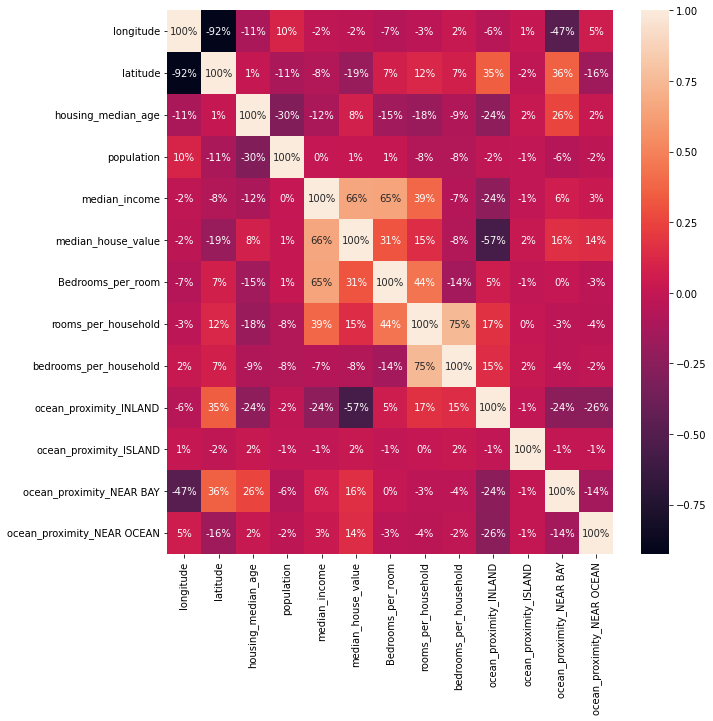

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".0%")
plt.show()

In [41]:
df["median_house_value"].count()

20638

In [42]:
X=df.drop("median_house_value",axis=1)

In [43]:
y=df["median_house_value"]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=67)

In [47]:
X_train.shape

(16510, 12)

In [48]:
y_train.shape

(16510,)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [50]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rt=RandomForestRegressor()
svr=SVR()

In [51]:
from sklearn.metrics import r2_score,mean_squared_error
def my_model(model):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    print("Train Data")
    print("R2_score",(round(r2_score(y_train,y_pred_train),2)))
    print("RMSE",(round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2)))
    
    print("Test Data")
    print("R2_score",(round(r2_score(y_test,y_pred_test),2)))
    print("RMSE",(round(np.sqrt(mean_squared_error(y_test,y_pred_test)),2)))
    
    return model

In [52]:
my_model(lr)

Train Data
R2_score 0.64
RMSE 0.34
Test Data
R2_score 0.63
RMSE 0.35


LinearRegression()

# Decision Tree

In [53]:
my_model(dt)

Train Data
R2_score 1.0
RMSE 0.0
Test Data
R2_score 0.67
RMSE 0.32


DecisionTreeRegressor()

# Random Forest Regressor

In [54]:
my_model(rt)

Train Data
R2_score 0.98
RMSE 0.09
Test Data
R2_score 0.82
RMSE 0.24


RandomForestRegressor()

# SVR

In [55]:
my_model(svr)

Train Data
R2_score 0.78
RMSE 0.27
Test Data
R2_score 0.75
RMSE 0.29


SVR()

# Hyper parameter tuning of random forest regressor


In [92]:
param_grid={
     "min_samples_split":np.arange(2,50,2),
     "n_estimators":(50,100,150,200),
     "max_samples":[0.5,0.75],
     "max_features":[1,2,3]
}

In [93]:
from sklearn.model_selection import GridSearchCV
grid_clf=GridSearchCV(rt,param_grid=param_grid,cv=10,scoring=mean_squared_error,n_jobs=-1)
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3], 'max_samples': [0.5, 0.75],
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]),
                         'n_estimators': (50, 100, 150, 200)},
             scoring=<function mean_squared_error at 0x0000017D9FE6AD40>)

In [94]:
grid_clf.best_params_

{'max_features': 1,
 'max_samples': 0.5,
 'min_samples_split': 2,
 'n_estimators': 50}

In [97]:
y_pred_train=grid_clf.predict(X_train)
y_pred_test=grid_clf.predict(X_test)

In [102]:
print("Train Data")
print("RMSE",(round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2)))
print("R2 score",(round(r2_score(y_train,y_pred_train),2)))
print("Test Data")
print("r2_score",(round(r2_score(y_test,y_pred_test),2)))
print("RMSE",(round(np.sqrt(mean_squared_error(y_test,y_pred_test)),2)))

Train Data
RMSE 0.16
R2 score 0.92
Test Data
r2_score 0.78
RMSE 0.26


# HYPER PARAMETER TUNING OF SVR

In [104]:
param_grid1={"C":[0.1,1],
           "gamma":[0.1,0.01],
           "kernel":["rbf","linear"]}

In [105]:
from sklearn.model_selection import GridSearchCV
grid_clf1=GridSearchCV(svr,param_grid=param_grid1,cv=10,scoring=mean_squared_error,n_jobs=-1)
grid_clf1.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             scoring=<function mean_squared_error at 0x0000017D9FE6AD40>)

In [109]:
y_pred_train2=grid_clf1.predict(X_train)
y_pred_test2=grid_clf1.predict(X_test)

In [110]:
print("Train Data")
print("R2_score",(round(r2_score(y_train,y_pred_train2),2)))
print("RMSE",(round(np.sqrt(mean_squared_error(y_train,y_pred_train2)),2)))
    
print("Test Data")
print("R2_score",(round(r2_score(y_test,y_pred_test2),2)))
print("RMSE",(round(np.sqrt(mean_squared_error(y_test,y_pred_test2)),2)))

Train Data
R2_score 0.74
RMSE 0.29
Test Data
R2_score 0.72
RMSE 0.3
